In [2]:
import zipfile
import os

# Unzipping the dataset
with zipfile.ZipFile("D:\\sd wan -shiva.zip", 'r') as zip_ref:
    zip_ref.extractall("/work")

# Listing the contents of the dataset to understand its structure and files it comprises
os.listdir("/work")

['Network Anamoly Detection.docx', 'Test.txt', 'Train.txt']

In [3]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('/work/Train.txt', header=None)
test_df = pd.read_csv('/work/Test.txt', header=None)

# Display the first few rows of the train and test datasets
display(train_df.head())
display(test_df.head())

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [4]:


# Adjusting the column names list to match the data structure
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent',
                'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
                'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
                'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
                'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
                'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
                'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'label']
train_df.columns = column_names
test_df.columns = column_names

# Displaying the first few rows of the train dataset to verify the column names
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
# Checking for missing values in both datasets
train_missing_values = train_df.isnull().sum().sum()
test_missing_values = test_df.isnull().sum().sum()

(train_missing_values, test_missing_values)

(0, 0)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding categorical features
encoder = LabelEncoder()
train_df['protocol_type'] = encoder.fit_transform(train_df['protocol_type'])
train_df['service'] = encoder.fit_transform(train_df['service'])
train_df['flag'] = encoder.fit_transform(train_df['flag'])
train_df['attack_type'] = encoder.fit_transform(train_df['attack_type'])

# Splitting the dataset into features and target variable
X = train_df.drop(['attack_type', 'label'], axis=1)
y = train_df['attack_type']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the splits
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(100778, 41)

(25195, 41)

(100778,)

(25195,)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Training a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

(accuracy, classification_rep)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9979757888469935,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       185\n           1       1.00      0.33      0.50         9\n           3       1.00      0.91      0.95        11\n           4       1.00      1.00      1.00         1\n           5       0.99      0.99      0.99       733\n           6       0.00      0.00      0.00         3\n           9       1.00      1.00      1.00      8228\n          10       0.98      0.99      0.99       313\n          11       1.00      1.00      1.00     13422\n          12       0.00      0.00      0.00         1\n          13       1.00      1.00      1.00         1\n          14       1.00      0.93      0.96        43\n          15       1.00      0.99      1.00       573\n          16       0.00      0.00      0.00         1\n          17       1.00      0.99      0.99       738\n          18       1.00      1.00      1.00       534\n          19       0.00      0.00      0

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Defining additional models to test
additional_models = {
    'NaiveBayes': GaussianNB(),
    'KNeighbors': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

# Testing the additional models and recording their accuracy
additional_results = {}
for name, model in additional_models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    additional_results[name] = accuracy

additional_results


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


{'NaiveBayes': 0.43131573724945427,
 'KNeighbors': 0.9840047628497718,
 'DecisionTree': 0.9964278626711649}

In [21]:
import matplotlib.pyplot as plt

# Assuming you have stored the training and validation accuracies and losses during training
# You can plot them directly

# For RandomForestClassifier, there's no concept of epoch or training history
# So, you can just plot the evaluation metrics (accuracy, classification report) directly after training

# Plotting classification report
print(classification_rep)

# Plotting accuracy
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      0.33      0.50         9
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00         1
           5       0.99      0.99      0.99       733
           6       0.00      0.00      0.00         3
           9       1.00      1.00      1.00      8228
          10       0.98      0.99      0.99       313
          11       1.00      1.00      1.00     13422
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      0.93      0.96        43
          15       1.00      0.99      1.00       573
          16       0.00      0.00      0.00         1
          17       1.00      0.99      0.99       738
          18       1.00      1.00      1.00       534
          19       0.00      0.00      0.00         1
          20       1.00    

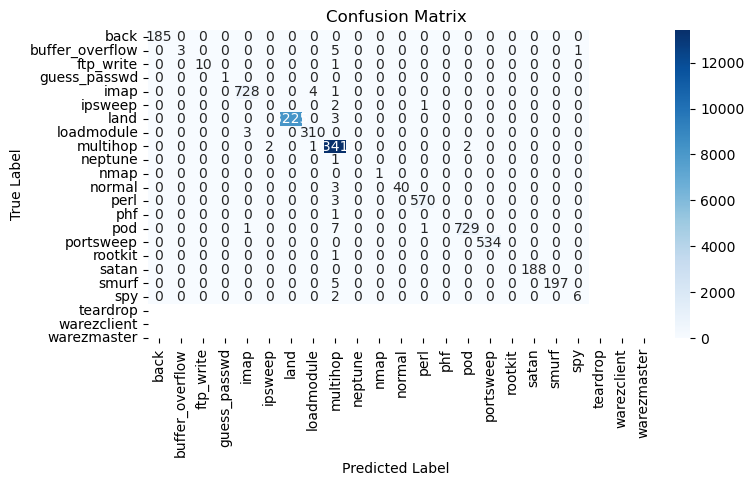

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
